In [1]:
import pickle
import tqdm
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

import util
import util_spkr_word_psychophysics_figures
import util_figures


In [2]:
"""
Load all word / voice recognition experiment results and define
mapping from shorthand model names to tags in the results file
"""

fn_data = '/om2/user/msaddler/phaselocknet/data/model/spkr_word_recognition.pkl'
with open(fn_data, 'rb') as f:
    EXPERIMENT_DATAFRAMES = pickle.load(f)

map_k_to_tag_model = {
    "human": "human",
    "3000": "models/spkr_word_recognition/IHC3000/arch0_00??",
    "1000": "models/spkr_word_recognition/IHC1000/arch0_00??",
    "320": "models/spkr_word_recognition/IHC0320/arch0_00??",
    "50": "models/spkr_word_recognition/IHC0050/arch0_00??",
    "3000_simple": "models/spkr_word_recognition/simplified_IHC3000/arch0_00??",
    "1000_simple": "models/spkr_word_recognition/simplified_IHC1000/arch0_00??",
    "320_simple": "models/spkr_word_recognition/simplified_IHC0320/arch0_00??",
    "50_simple": "models/spkr_word_recognition/simplified_IHC0050/arch0_00??",
    "3000_spkr": "models/spkr_recognition/IHC3000/arch0_00??",
    "1000_spkr": "models/spkr_recognition/IHC1000/arch0_00??",
    "320_spkr": "models/spkr_recognition/IHC0320/arch0_00??",
    "50_spkr": "models/spkr_recognition/IHC0050/arch0_00??",
    "3000_word": "models/word_recognition/IHC3000/arch0_00??",
    "1000_word": "models/word_recognition/IHC1000/arch0_00??",
    "320_word": "models/word_recognition/IHC0320/arch0_00??",
    "50_word": "models/word_recognition/IHC0050/arch0_00??",
}


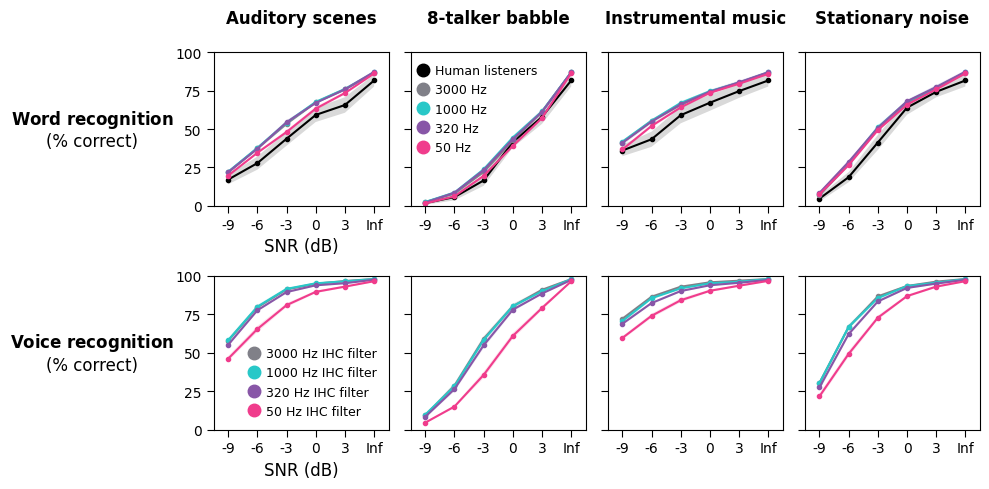

In [4]:
"""
Plot human and model word/voice recognition as a function of
SNR and background noise condition (similar to word-in-noise
recognition experiment from Kell et al. 2018, Neuron)
"""
tag_expt = 'kell_like'
df_results = EXPERIMENT_DATAFRAMES[tag_expt]
list_k_model = [
    'human',
    '3000',
    '1000',
    '320',
    '50',
]
list_key_task = [
    'word',
    'spkr',
]
list_condition_title = [
    (0, 'Auditory\nscenes'),
    (1, '8-talker\nbabble'),
    (2, 'Instrumental\nmusic'),
    (3, 'Stationary\nnoise'),
]
fig, ax_arr = plt.subplots(
    nrows=len(list_key_task),
    ncols=4,
    figsize=(10, 2.5 * len(list_key_task)),
    sharey=True)
for r, key_task in enumerate(list_key_task):
    for c, (condition, str_title) in enumerate(list_condition_title):
        ax = ax_arr[r, c]
        for k in list_k_model:
            tag_model = map_k_to_tag_model[k]
            color, label = util.get_color_and_label_from_model_tag(tag_model)
            df = df_results[df_results.tag_model == tag_model]
            kwargs_plot_update = {
                'marker': '.',
                'ms': 6,
                'mfc': color,
                'mew': 1,
                'lw': 1.5,
                'label': label,
            }
            str_ylabel = '{} recognition\n(% correct)'.format('Word' if key_task == 'word' else 'Voice')
            kwargs_format_axes_update = {
                'str_ylabel': str_ylabel if c == 0 else None,
                'str_xlabel': 'SNR (dB)' if c == 0 else None,
                'fontsize_ticks': 10,
                'xticklabels': [-9, -6, -3, 0, 3, 'Inf'],
                'str_title': str_title.replace('\n', ' ') + '\n' if r == 0 else None,
                'fontweight_title': 'bold'
            }
            kwargs_legend_update = {
                'loc': 'lower right',
                'markerscale': 3,
                'borderaxespad': 0.75,
                'fontsize': 9,
            }
            include_legend = condition == 0
            if (key_task == 'word') or ('inharmonic' in tag_expt):
                include_legend = condition == 1
                kwargs_legend_update['loc'] = 'upper left'
                kwargs_plot_update['label'] = label.replace(' IHC filter', '')
            if (k == 'human') and (key_task == 'spkr'):
                pass
            else:
                ax = util_spkr_word_psychophysics_figures.make_plot_kell_like_recognition(
                    ax,
                    df,
                    key_task=key_task,
                    restrict_background_condition=[condition],
                    include_legend=include_legend,
                    color=color,
                    kwargs_plot_update=kwargs_plot_update,
                    kwargs_legend_update=kwargs_legend_update,
                    kwargs_format_axes_update=kwargs_format_axes_update,
                )
        str_ylabel = '{}'.format('Word' if key_task == 'word' else 'Voice')
        str_ylabel = r'$\bf{' + str_ylabel + '}$' + r' $\bf{recognition}$'
        str_ylabel += '\n(% correct)'
        ax_arr[r, 0].set_ylabel(str_ylabel, rotation=0, ha='center', va='center', labelpad=60)
plt.tight_layout()
plt.show()


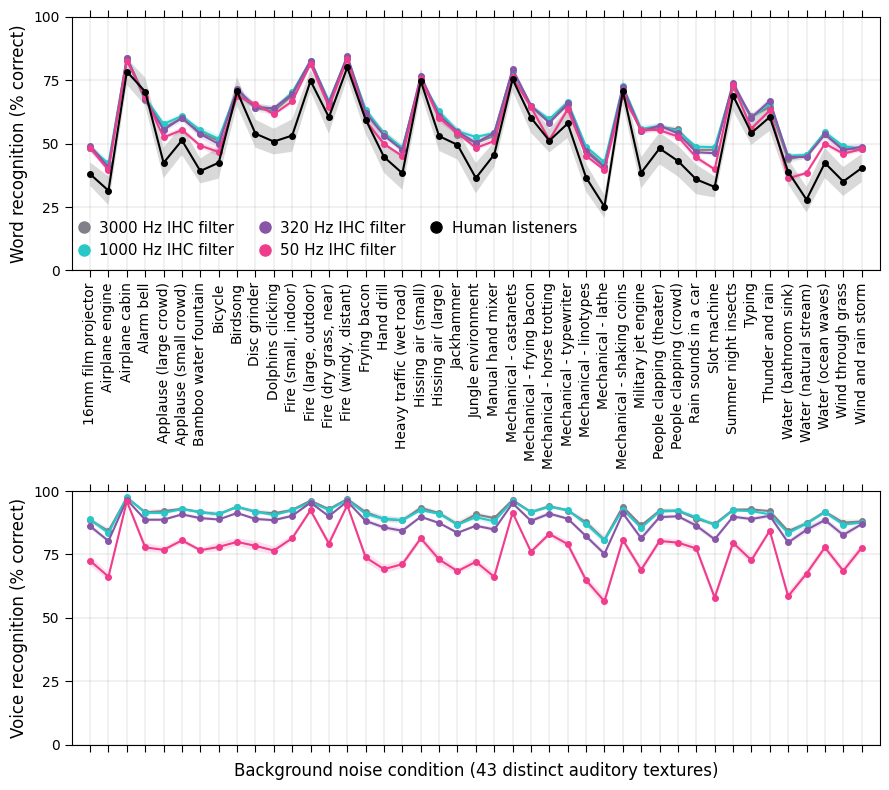

In [5]:
"""
Plot word and voice recognition accuracy as a function of the 43
different auditory textures used as background noise (-3 dB SNR)
"""
df_results = EXPERIMENT_DATAFRAMES['speech_in_synthetic_textures']
list_k_model = [
    '3000',
    '1000',
    '320',
    '50',
    'human',
]
list_key_task = [
    'word',
    'spkr',
]
map_int_to_label = {
    0: '16mm film projector',
    1: 'Airplane engine',
    2: 'Airplane cabin',
    3: 'Alarm bell',
    4: 'Applause (large crowd)',
    5: 'Applause (small crowd)',
    6: 'Bamboo water fountain',
    7: 'Bicycle',
    8: 'Birdsong',
    9: 'Disc grinder',
    10: 'Dolphins clicking',
    11: 'Fire (small, indoor)',
    12: 'Fire (large, outdoor)',
    13: 'Fire (dry grass, near)',
    14: 'Fire (windy, distant)',
    15: 'Frying bacon',
    16: 'Hand drill',
    17: 'Heavy traffic (wet road)',
    18: 'Hissing air (small)',
    19: 'Hissing air (large)',
    20: 'Jackhammer',
    21: 'Jungle environment',
    22: 'Manual hand mixer',
    23: 'Mechanical - castanets',
    24: 'Mechanical - frying bacon',
    25: 'Mechanical - horse trotting',
    26: 'Mechanical - typewriter',
    27: 'Mechanical - linotypes',
    28: 'Mechanical - lathe',
    29: 'Mechanical - shaking coins',
    30: 'Military jet engine',
    31: 'People clapping (theater)',
    32: 'People clapping (crowd)',
    33: 'Rain sounds in a car',
    34: 'Slot machine',
    35: 'Summer night insects',
    36: 'Typing',
    37: 'Thunder and rain',
    38: 'Water (bathroom sink)',
    39: 'Water (natural stream)',
    40: 'Water (ocean waves)',
    41: 'Wind through grass',
    42: 'Wind and rain storm',
}
xticks = np.arange(len(map_int_to_label)).astype(int)
xticklabels = [map_int_to_label[_] for _ in xticks]
fig, ax_arr = plt.subplots(nrows=len(list_key_task), ncols=1, figsize=(9, 8))
for itr_ax, key_task in enumerate(list_key_task):
    ax = ax_arr[itr_ax]
    for itr_model, k in enumerate(list_k_model):
        tag_model = map_k_to_tag_model[k]
        color, label = util.get_color_and_label_from_model_tag(tag_model)
        df = df_results[df_results.tag_model == tag_model]
        kwargs_plot_update = {
            'label': label,
        }
        kwargs_legend_update = {
            'fontsize': 11,
            'handlelength': 0,
            'markerscale': 2,
            'ncols': 3,
            'borderaxespad': 0.5,
            'loc': 'lower left',
        }
        kwargs_format_axes_update = {
            'fontsize_ticks': 10,
            'xticks': xticks,
            'xticklabels': xticklabels if itr_ax == 0 else [],
            'str_xlabel': 'Background noise condition (43 distinct auditory textures)' if itr_ax == 1 else None,
            'major_tick_params_kwargs_update': {'top': True},
        }
        if len(df) > 0:
            ax = util_spkr_word_psychophysics_figures.make_plot_speech_in_synthetic_textures(
                ax,
                df,
                key_task=key_task,
                color=color,
                kwargs_plot_update=kwargs_plot_update,
                kwargs_legend_update=kwargs_legend_update,
                kwargs_format_axes_update=kwargs_format_axes_update,
                include_legend=key_task=='word')
    if itr_ax == 0:
        ax.set_xticklabels(xticklabels, rotation=90, fontsize=10)
    ax.grid(lw=0.25)
plt.tight_layout()
plt.show()


In [6]:
"""
Compute human and model split-half reliability to estimate noise-corrected variance explained
"""
list_k = [
    '3000',
    '1000',
    '320',
    '50',
    'human',
]
dict_split_half = {}
for k in list_k:
    df_to_split = df_results[np.logical_and.reduce([
        df_results.tag_model == map_k_to_tag_model[k],
        df_results.snr == -3,
    ])].copy()
    df_to_split['fn_eval'] = df_to_split['correct_word_list'].map(lambda _: list(range(len(_))))
    df_to_split = df_to_split.explode(column=['correct_word_list', 'correct_spkr_list', 'fn_eval'])
    list_fn_eval = df_to_split.fn_eval.unique()
    n = len(list_fn_eval)
    print(f'Computing split-half reliability for {n} participants ({k})')
    dict_split_half[k] = {'spkr': [], 'word': []}
    np.random.seed(0)
    for _ in tqdm.tqdm(range(100)):
        np.random.shuffle(list_fn_eval)
        df0 = df_to_split[df_to_split['fn_eval'].isin(list_fn_eval[:int(n / 2)])]
        df1 = df_to_split[df_to_split['fn_eval'].isin(list_fn_eval[int(n / 2):])]
        df0 = df0.groupby(['tag_model', 'index_texture', 'snr']).agg({
            'correct_word_list': 'mean',
            'correct_spkr_list': 'mean',
        }).reset_index()
        df1 = df1.groupby(['tag_model', 'index_texture', 'snr']).agg({
            'correct_word_list': 'mean',
            'correct_spkr_list': 'mean',
        }).reset_index()
        index0 = df0.index_texture.values
        index1 = df1.index_texture.values
        assert np.array_equal(index0, index1)
        for key_task in dict_split_half[k].keys():
            x0 = 100 * df0[f'correct_{key_task}_list'].values
            x1 = 100 * df1[f'correct_{key_task}_list'].values
            if not np.isnan(x0).any():
                r, p = scipy.stats.pearsonr(x0, x1)
                r = (2 * r) / (1 + r)
                dict_split_half[k][key_task].append(r)
    dict_split_half[k] = {key_task: np.mean(v) for key_task, v in dict_split_half[k].items()}
dict_split_half


Computing split-half reliability for 10 participants (3000)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 32.65it/s]


Computing split-half reliability for 10 participants (1000)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 33.67it/s]


Computing split-half reliability for 10 participants (320)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 33.67it/s]


Computing split-half reliability for 10 participants (50)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 33.74it/s]


Computing split-half reliability for 43 participants (human)


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 32.88it/s]
/om2/user/msaddler/.conda/envs/tf/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/om2/user/msaddler/.conda/envs/tf/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{'3000': {'spkr': 0.991812411386391, 'word': 0.997964686129796},
 '1000': {'spkr': 0.9926381646197475, 'word': 0.9983948185396625},
 '320': {'spkr': 0.9933948352467681, 'word': 0.9985832211231476},
 '50': {'spkr': 0.9974737480557577, 'word': 0.9985050222500764},
 'human': {'spkr': nan, 'word': 0.9677674727498684}}

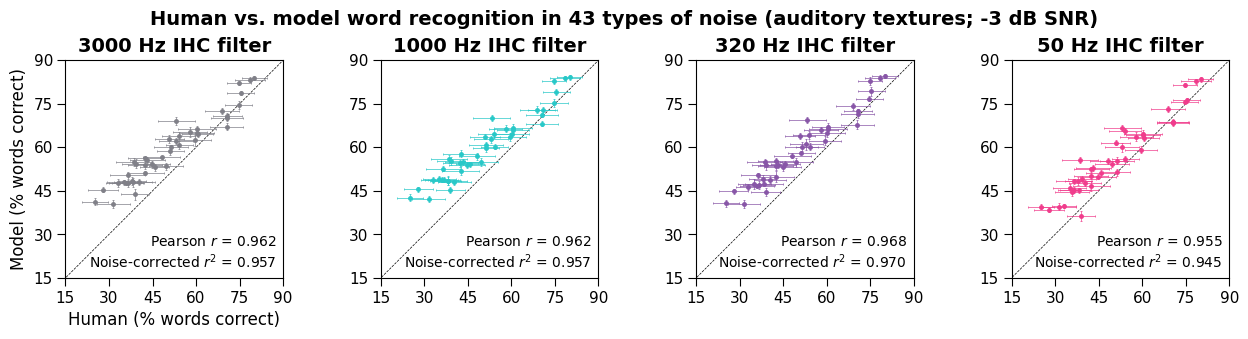

In [7]:
"""
Scatter plots of human vs. model word recognition accuracy in the 43 different auditory textures
"""
list_key_txy = [
    ('word', 'word', 'human', '3000'),
    ('word', 'word', 'human', '1000'),
    ('word', 'word', 'human', '320'),
    ('word', 'word', 'human', '50'),
]
fig, ax_arr = plt.subplots(figsize=(3.25 * len(list_key_txy), 3.25), ncols=len(list_key_txy), nrows=1)
ax_arr = np.array(ax_arr).reshape([len(list_key_txy)])
for itr_ax, (key_task_x, key_task_y, key_x, key_y) in enumerate(list_key_txy):
    ax = ax_arr[itr_ax]
    tag_x = map_k_to_tag_model[key_x]
    tag_y = map_k_to_tag_model[key_y]
    dfx = df_results[np.logical_and.reduce([
        df_results.tag_model == tag_x,
        df_results.snr == -3,
    ])]
    dfy = df_results[np.logical_and.reduce([
        df_results.tag_model == tag_y,
        df_results.snr == -3,
    ])]
    index_x = dfx.index_texture.values
    index_y = dfy.index_texture.values
    assert np.array_equal(index_x, index_y)
    x = 100 * dfx[f'correct_{key_task_x}_mean'].values
    xerr = 2 * 100 * dfx[f'correct_{key_task_x}_sem'].values
    y = 100 * dfy[f'correct_{key_task_y}_mean'].values
    yerr = 2 * 100 * dfy[f'correct_{key_task_y}_sem'].values    
    color_x, label_x = util.get_color_and_label_from_model_tag(tag_x)
    color_y, label_y = util.get_color_and_label_from_model_tag(tag_y)
    r, p = scipy.stats.pearsonr(x, y)
    rmse = np.sqrt(np.mean(np.square(x - y)))
    split_half_r2x = dict_split_half[key_x][key_task_x] ** 2
    split_half_r2y = dict_split_half[key_y][key_task_y] ** 2
    ncr2 = ((r ** 2) / np.exp(np.mean(np.log([split_half_r2x, split_half_r2y]))))
    label = 'Pearson $r$ = {:.3f}\nNoise-corrected $r^2$ = {:.3f}'.format(r, ncr2)
    ax.errorbar(x, y, xerr=xerr, yerr=yerr, marker='', ls='', color=color_y, lw=0.5, mew=0.5, capsize=1, capthick=0.5)
    ax.plot(x, y, marker='o', ms=2.5, ls='', color=color_y, label=label)
    kwargs_legend = {
        'loc': 'lower right',
        'frameon': False,
        'markerscale': 0,
        'handlelength': 0,
        'borderaxespad': 0,
        'handletextpad': 0,
        'borderpad': 0.5,
        'fontsize': 10,
    }
    legend = ax.legend(**kwargs_legend)
    for t in legend.get_texts():
        t.set_ha('right')
    ax.plot([0, 100], [0, 100], color='k', ls='--', lw=0.5, zorder=-100)
    ax = util_figures.format_axes(
        ax,
        str_title=f'{label_y}',
        str_xlabel='Human (% {}s correct)'.format('word' if key_task_x == 'word' else 'voice') if itr_ax == 0 else None,
        str_ylabel='Model (% {}s correct)'.format('word' if key_task_y == 'word' else 'voice') if itr_ax == 0 else None,
        xlimits=[15, 90],
        ylimits=[15, 90],
        xticks=np.arange(15, 91, 15),
        yticks=np.arange(15, 91, 15),
        fontweight_title='bold',
        fontsize_ticks=11,
        fontsize_labels=12,
        fontsize_title=14,
    )
    ax.set_aspect('equal')
fig.tight_layout()
fig.subplots_adjust(top=0.825)
fig.suptitle("Human vs. model word recognition in 43 types of noise (auditory textures; -3 dB SNR)", fontweight='bold', fontsize=14)
plt.show()


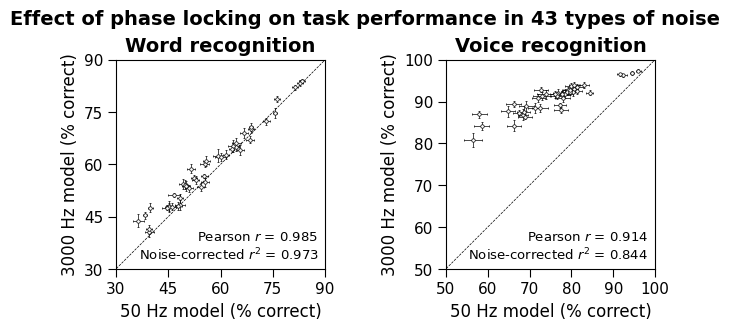

In [8]:
"""
Scatter plots of 3000 vs. 50 Hz phase locking model word and voice recognition in the 43 different auditory textures
"""
list_key_txy = [
    ('word', 'word', '50', '3000'),
    ('spkr', 'spkr', '50', '3000'),
]
fig, ax_arr = plt.subplots(figsize=(3.35 * len(list_key_txy), 3.25), ncols=len(list_key_txy), nrows=1)
ax_arr = np.array(ax_arr).reshape([len(list_key_txy)])
for itr_ax, (key_task_x, key_task_y, key_x, key_y) in enumerate(list_key_txy):
    ax = ax_arr[itr_ax]
    tag_x = map_k_to_tag_model[key_x]
    tag_y = map_k_to_tag_model[key_y]
    dfx = df_results[np.logical_and.reduce([
        df_results.tag_model == tag_x,
        df_results.snr == -3,
    ])]
    dfy = df_results[np.logical_and.reduce([
        df_results.tag_model == tag_y,
        df_results.snr == -3,
    ])]
    index_x = dfx.index_texture.values
    index_y = dfy.index_texture.values
    assert np.array_equal(index_x, index_y)
    x = 100 * dfx[f'correct_{key_task_x}_mean'].values
    xerr = 2 * 100 * dfx[f'correct_{key_task_x}_sem'].values
    y = 100 * dfy[f'correct_{key_task_y}_mean'].values
    yerr = 2 * 100 * dfy[f'correct_{key_task_y}_sem'].values    
    color_x, label_x = util.get_color_and_label_from_model_tag(tag_x)
    color_y, label_y = util.get_color_and_label_from_model_tag(tag_y)
    color_y = 'k'
    r, p = scipy.stats.pearsonr(x, y)
    rmse = np.sqrt(np.mean(np.square(x - y)))
    split_half_r2x = dict_split_half[key_x][key_task_x] ** 2
    split_half_r2y = dict_split_half[key_y][key_task_y] ** 2
    ncr2 = ((r ** 2) / np.exp(np.mean(np.log([split_half_r2x, split_half_r2y]))))
    label = 'Pearson $r$ = {:.3f}\nNoise-corrected $r^2$ = {:.3f}'.format(r, ncr2)
    ax.errorbar(x, y, xerr=xerr, yerr=yerr, marker='', ls='', color=color_y, lw=0.5, mew=0.5, capsize=1, capthick=0.5)
    ax.plot(x, y, marker='o', ms=2.5, ls='', color=color_y, mfc='w', mew=0.5, label=label)
    kwargs_legend = {
        'loc': 'lower right',
        'frameon': False,
        'markerscale': 0,
        'handlelength': 0,
        'borderaxespad': 0,
        'handletextpad': 0,
        'borderpad': 0.5,
        'fontsize': 9.5,
    }
    legend = ax.legend(**kwargs_legend)
    for t in legend.get_texts():
        t.set_ha('right')
    ax.plot([0, 100], [0, 100], color='k', ls='--', lw=0.5, zorder=-100)
    ticks = np.arange(30, 91, 15) if key_task_x == 'word' else np.arange(50, 101, 10)
    ax = util_figures.format_axes(
        ax,
        str_title='{} recognition'.format('Word' if key_task_x == 'word' else 'Voice'),
        str_xlabel='{} (% correct)'.format(label_x.replace('IHC filter', 'model')),
        str_ylabel='{} (% correct)'.format(label_y.replace('IHC filter', 'model')),
        xlimits=[ticks[0], ticks[-1]],
        ylimits=[ticks[0], ticks[-1]],
        xticks=ticks,
        yticks=ticks,
        fontweight_title='bold',
        fontsize_title=14,
        fontsize_ticks=11,
        fontsize_labels=12,
    )
    ax.set_aspect('equal')
    # z = y - x
    # print(f'{key_task_x=} | min={z.min()}, max={z.max()}, mean={z.mean()}, median={np.median(z)}, s.d.={np.std(z)}')
fig.tight_layout()
fig.subplots_adjust(top=0.825)
fig.suptitle("Effect of phase locking on task performance in 43 types of noise", fontweight='bold', fontsize=14)
plt.show()


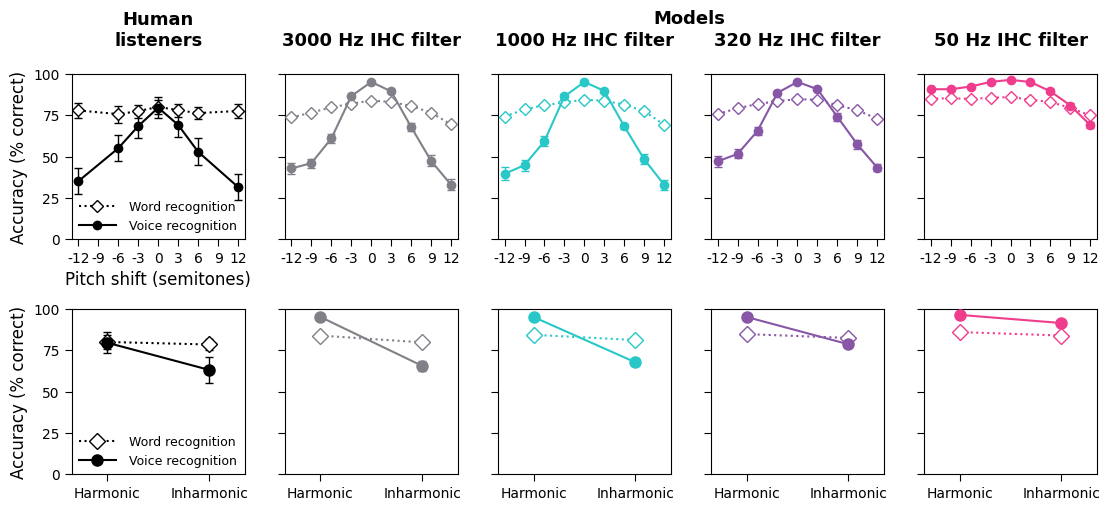

In [9]:
"""
Plot human and model word/voice recognition as a function of pitch shift or condition: harmonic/inharmonic
(similar to voice recognition experiment from McPherson et al. 2018, Nat Hum Behav)
"""
tag_expt = 'pitch_altered'
df_results = EXPERIMENT_DATAFRAMES[tag_expt]
list_k_model = [
    'human',
    '3000',
    '1000',
    '320',
    '50',
]
nrows = 2
ncols = len(list_k_model)
fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(2.25 * ncols, 2.6 * nrows), sharey=True)
for c, k in enumerate(list_k_model):
    tag_model = map_k_to_tag_model[k]
    color, label = util.get_color_and_label_from_model_tag(tag_model)
    df = df_results[df_results.tag_model == tag_model]
    kwargs_plot_update = {
        'ms': 6,
        'mew': 1,
        'lw': 1.5,
    }
    kwargs_legend_update = {
        'fontsize': 9,
        'markerscale': 1.0,
        'borderaxespad': 0.25,
        'handlelength': 3,
    }
    if 'human' in tag_model:
        label = 'Human\nlisteners'
    else:
        label = '\n' + label
    kwargs_format_axes_update = {
        'str_title': label + '\n',
        'fontweight_title': 'bold',
        'fontsize_title': 13,
        'fontsize_ticks': 10,
        'str_ylabel': 'Accuracy (% correct)' if c == 0 else None,
        'str_xlabel': 'Pitch shift (semitones)' if c == 0 else None,
    }
    ax = ax_arr[0, c]
    util_spkr_word_psychophysics_figures.make_plot_pitch_shifted_recognition(
        ax,
        df,
        color=color,
        kwargs_plot_update=kwargs_plot_update,
        kwargs_legend_update=kwargs_legend_update,
        kwargs_format_axes_update=kwargs_format_axes_update,
        include_legend=c == 0)
    kwargs_format_axes_update = {
        'fontsize_ticks': 10,
        'str_ylabel': 'Accuracy (% correct)' if c == 0 else None,
        'str_xlabel': None,
    }
    ax = ax_arr[1, c]
    util_spkr_word_psychophysics_figures.make_plot_pitch_condition_recognition(
        ax,
        df,
        color=color,
        kwargs_plot_update=kwargs_plot_update,
        kwargs_legend_update=kwargs_legend_update,
        kwargs_format_axes_update=kwargs_format_axes_update,
        include_legend=c == 0)
plt.tight_layout()
fig.suptitle('Models', fontsize=13, fontweight='bold', x=0.6175, y=0.9725, ha='center', va='top')
plt.show()


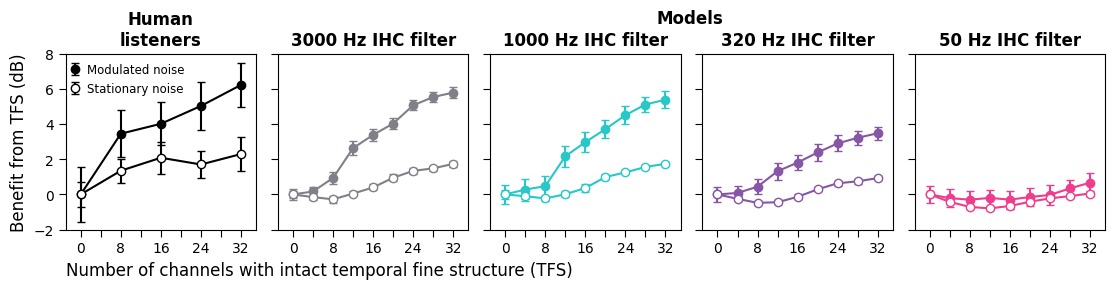

In [10]:
"""
Plot improvement in speech reception thresholds as a function of number of channels with intact TFS
(experiment from Hopkins & Moore 2009, JASA)
"""
tag_expt = 'hopkins_moore_2009'
df_results = EXPERIMENT_DATAFRAMES[tag_expt]
list_k_model = [
    'human',
    '3000',
    '1000',
    '320',
    '50',
]
nrows = 1
ncols = len(list_k_model)
fig, ax_arr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(2.25 * ncols, 2.75 * nrows), sharey=True)
for itr_ax, k in enumerate(list_k_model):
    tag_model = map_k_to_tag_model[k]
    color, label = util.get_color_and_label_from_model_tag(tag_model)
    df = df_results[df_results.tag_model == tag_model]
    kwargs_plot_update = {
        'ms': 6,
        'mew': 1,
        'lw': 1.5,
    }
    kwargs_legend_update = {
        'fontsize': 8.5,
        'markerscale': 1.0,
        'borderaxespad': 0.5,
        'handlelength': 0,
    }
    if  'human' in tag_model:
        label = 'Human\nlisteners'
    else:
        label = '\n' + label
    kwargs_format_axes_update = {
        'str_title': label,
        'fontweight_title': 'bold',
        'fontsize_ticks': 10,
        'str_ylabel': 'Benefit from TFS (dB)' if itr_ax == 0 else None,
        'str_xlabel': None,
    }
    ax = ax_arr[itr_ax]
    util_spkr_word_psychophysics_figures.make_plot_hopkins_moore_2009_tfs_benefit(
        ax,
        df,
        color=color,
        kwargs_plot_update=kwargs_plot_update,
        kwargs_legend_update=kwargs_legend_update,
        kwargs_format_axes_update=kwargs_format_axes_update,
        include_legend=itr_ax == 0,
    )
plt.tight_layout()
ax_arr[0].set_xlabel('Number of channels with intact temporal fine structure (TFS)', ha='left', x=0)
fig.suptitle('Models', fontsize=12, fontweight='bold', x=0.6175, y=0.95, ha='center', va='top')
plt.show()
